## Exercise 3.1 (numpy)

Write a script which reads a matrix from a file like this one​ and solves the linear matrix equation Ax=b where b is the last column of the input-matrix and A is the other columns. It is okay to use the solve()-function from numpy.linalg. Does the result make sense?

1,2,3,4
6,9,12,7 
2,0,9,10

In [240]:
import numpy as np

f = open ( 'matrix.txt' , 'r')
matrix = [ map(int,line.split(',')) for line in f if line.strip() != "" ]

print "The input matrix is: \n \n {} \n".format(np.matrix(matrix))

A = np.matrix(matrix)[:,:-1]
b = np.array(matrix)[:,-1]

print "The matrix A: \n \n {} \n".format(A)
print "The matrix B: \n \n {} \n".format(b)

x = np.linalg.solve(A, b)

print "The solution to the linear matrix equation is: \n \n {} \n".format(x)

# Check if the result make sense
print "DOES THE RESULT MAKE SENSE? \n"
#let´s check the result by comparing the result of A.dot(x) to b
print "The result from A.dot(x) is: \n \n {} \n".format(A.dot(x))


# To check if the numbers in the two arrays are the same we created this funciton
# Re: Comparing floats for equality in Python
def feq(a,b):
    if abs(a-b)<0.00000001:
        return 1
    else:
        return 0

isTheSame = True
# Here we go through every float number in the result of the dot product A.dot(x)
#   we use np.nditer to iter through the array and then we use the function feq to check if the float numbers are equal
for i,number in enumerate(np.nditer(np.asarray(A.dot(x)))): 
    if feq(float(b[i]), float(number)) == 0:
        isTheSame = False
        break

if isTheSame:
    print "Which is the same as b"
else:
    print "Which is not the same as b"

The input matrix is: 
 
 [[ 1  2  3  4]
 [ 6  9 12  7]
 [ 2  0  9 10]] 

The matrix A: 
 
 [[ 1  2  3]
 [ 6  9 12]
 [ 2  0  9]] 

The matrix B: 
 
 [ 4  7 10] 

The solution to the linear matrix equation is: 
 
 [-5.09090909  1.18181818  2.24242424] 

DOES THE RESULT MAKE SENSE? 

The result from A.dot(x) is: 
 
 [[ 4.  7. 10.]] 

Which is the same as b


In [243]:
matrix

[[1, 2, 3, 4], [6, 9, 12, 7], [2, 0, 9, 10]]

## Exercise 3.2  scipy

Write a script that reads in this list of points (x,y)​, fits/interpolates them with a polynomial of degree 3. Solve for the (real) roots of the polynomial numerically using Scipy’s optimization functions (not the root function in Numpy). Does the result make sense (plot something to check).?

The polynomial is as follows: y = 3.91800200959 + -2.00736184939*x + 1.0010618462*x^2 + 2.99999264076*x^3
The real roots are: [-1.4346362874780969, -1.4346362874780967, -1.4346362874780967, -1.4346362874781209, -1.4346362874780976, -1.4346362874780969, -1.4346362874780969, -1.4346362874781386, -1.4346362874780971, -1.4346362874780967, -1.4346362874781897, -1.4346362874780969, -1.4346362874780969, -1.4346362874780978, -1.4346362874780967, -1.4346362874780967, -1.4346362874780969, -1.4346362874780969, -1.4346362874780978, -1.4346362874780827, 0.37403139438588834, 0.37485266795694844, 0.37404966133734757, 0.3689353161346639, 0.37447685330444941, 0.37391661548571326, -1.4346362874780967, 0.37347230427015854, -1.4346362874780969, 0.36831652879880883, 0.37423941265349941, -1.4346362874780967, -1.4346362874780891, 0.37303378406038196, -1.4346362874780967, 0.3738868138079296, -1.4346362874780969, 0.37377270583091021, 0.37230714483144645, 0.37649743281903353]


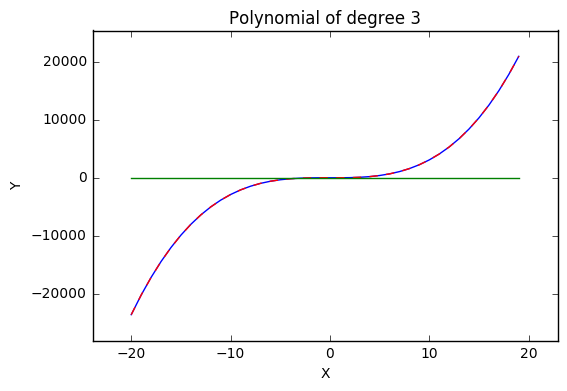

In [274]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

f = open( 'list_of_points' , 'r')

X = []
Y = []

for line in f:
    # The method strip() returns a copy of the string in which all chars have been stripped from the beginning 
    #   and the end of the string 
    line = line.strip()
    # Split the line on ' ' and capture the result in the variables x and y
    x,y = line.split(' ')
    X.append(float(x))
    Y.append(float(y))

# Use numpy.polyfit to fit polynomial of degree 3
#  The function returns the polynomial coefficients, highest power first
z =  np.polyfit(np.array(X),np.array(Y),3)
# scipy.optimize.root

print "The polynomial is as follows: y = {} + {}*x + {}*x^2 + {}*x^3".format(z[-1],z[-2],z[-3],z[-4])

# Calculating the Y values for the polynomial
#   here we use anonymous function to calculate the Y values for each x
Y_poly = map((lambda x: z[-1] + x*z[-2] + x**2*z[-3] + x**3*z[-4]),X)

# Find the real roots of the polynomial by using fsolve
real_roots = []

for initGuess in range(-20,20):
    real_roots.append(fsolve((lambda x: z[-1] + x*z[-2] + x**2*z[-3] + x**3*z[-4]),initGuess)[0])

print "The real roots are: {}".format(real_roots)

# plot up the original coordinates
plt.plot(X,Y)

# plot up the polynomial coordiantes
plt.plot(X,Y_poly,'--',color='r')

# plot a zero line onto the graph to visualize the real roots
plt.plot(X,np.zeros(len(X)),color='g')

plt.title("Polynomial of degree 3")
plt.xlabel("X")
plt.ylabel("Y")
plt.margins(0.1,0.1)
plt.show()


## Exercise 3.3 (cython)


In [30]:
from __future__ import division

# Normal python function to calculate the sum 1/1^2 + 1/2^2 + 1/3^2 + ... + 1/10000^2
def calculate(n):
    sum = 0.0
    for i in range(1,n+1):
        sum += 1/(i**2)
    return sum

# Find the execution time of the python fucntion
import time
start_time = time.time()
for j in range(0,500):
    s = calculate(10000)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.17089319229 seconds ---


In [24]:
from __future__ import division

# cython function to calculate the sum 1/1^2 + 1/2^2 + 1/3^2 + ... + 1/10000^2
cpdef float normal_execution():
    cdef float sum = 0.0
    cdef int i
    for i in range(1,10001):
        sum += 1/(i**2)

# Find the execution time of the python fucntion
import time
start_time = time.time()
for j in range(0,500):
    normal_execution()
print("--- %s seconds ---" % (time.time() - start_time))

SyntaxError: invalid syntax (<ipython-input-24-b79d0f35097b>, line 4)